In [2]:
# Import de Bibliotecas

import random
import numpy as np

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
# Carregando data e Separando em sets de Treino e Teste
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


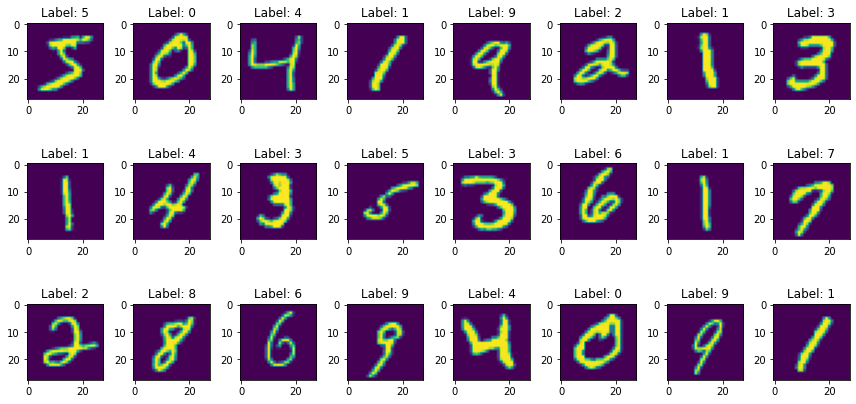

In [4]:
%matplotlib inline

def show_table(row, col):
  # define number of images to show
  num_row = row
  num_col = col
  num = num_row * num_col

  # get images
  images = x_train[0:num]
  labels = y_train[0:num]

  # plot images
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))

  for i in range(num):
      ax = axes[i//num_col, i%num_col]
      ax.imshow(np.asarray(x_train[i]).squeeze())
      ax.set_title(f'Label: {labels[i]}')

  plt.tight_layout()
  plt.show()

# Ploting Table (3x8)
show_table(3, 8)

In [5]:
x_train, x_test = x_train.astype("float32") / 255, x_test.astype("float32") / 255

In [6]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000, 10)

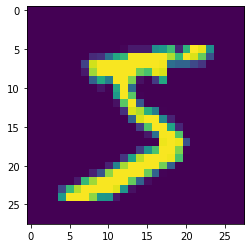

In [9]:
plt.imshow(x_train[0])

In [10]:
# Com Camada Convolucional

model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)), # Input
     
        Conv2D(32, 3, padding='same', activation="relu"),
        Conv2D(32, 3, padding='same', activation="relu"),
        Conv2D(32, 3, padding='same', activation="relu"),
        MaxPooling2D((2,2), (2,2)),
     
        Conv2D(64, 3, padding='same', activation="relu"),
        Conv2D(64, 3, padding='same', activation="relu"),
        Conv2D(64, 3, padding='same', activation="relu"),
        MaxPooling2D((2,2), (2,2)),
     
        Conv2D(128, 3, padding='same', activation="relu"),
        Conv2D(128, 3, padding='same', activation="relu"),
        Conv2D(128, 3, padding='same', activation="relu"),
        MaxPooling2D((2,2), (2,2)),

        Flatten(),
        Dropout(0.2),
     
        Dense(128, activation='relu'),
     
        Dense(10, activation="softmax"), # Output
    ]
)

model.summary()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [11]:
batch_size = 32
epochs = 25

# Callback call

es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
hist = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[es])

Epoch 1/25
1688/1688 [==============================] - 539s 318ms/step - loss: 0.1559 - accuracy: 0.9514 - val_loss: 0.0584 - val_accuracy: 0.9822
Epoch 2/25
1688/1688 [==============================] - 521s 308ms/step - loss: 0.0551 - accuracy: 0.9836 - val_loss: 0.0450 - val_accuracy: 0.9890
Epoch 3/25
1688/1688 [==============================] - 519s 307ms/step - loss: 0.0429 - accuracy: 0.9871 - val_loss: 0.0612 - val_accuracy: 0.9845
Epoch 4/25
1688/1688 [==============================] - 516s 306ms/step - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0279 - val_accuracy: 0.9922
Epoch 5/25
1688/1688 [==============================] - 518s 307ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0257 - val_accuracy: 0.9932
Epoch 6/25
1688/1688 [==============================] - 509s 302ms/step - loss: 0.0267 - accuracy: 0.9922 - val_loss: 0.0349 - val_accuracy: 0.9908
Epoch 7/25
1688/1688 [==============================] - 512s 303ms/step - loss: 0.0255 - accuracy: 0.9920 - val_

In [12]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(y=hist.history['loss'],mode='lines', name='Training'))
fig.add_trace(go.Scatter(y=hist.history['val_loss'],mode='lines', name='Validation'))

fig.show()

In [13]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [14]:
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 34s 107ms/step - loss: 0.0301 - accuracy: 0.9917
Test loss: 0.030099719762802124
Test accuracy: 0.9916999936103821


In [15]:
model.save("/content/drive/MyDrive")

# Configuração

In [16]:
# Grupos
grupos = ['criado_por_G1', 'criado_por_G2', 'criado_por_3', 'criado_por_G4', 'criado_por_G5', 'criado_por_G6, criado_por_Tiago']
seu_grupo = 'criado_por_G1' # substitua o x pelo número do seu grupo

In [17]:
from pathlib import Path

url = 'https://drive.google.com/drive/folders/1JyZs0ePK3PnAiCtF1JrGVzxfp3vf97MN?usp=sharing'

import gdown
gdown.download_folder(url, quiet=True, remaining_ok = True)

['/content/digitos_para_teste/_2_2.png',
 '/content/digitos_para_teste/0_0.png',
 '/content/digitos_para_teste/0_1.png',
 '/content/digitos_para_teste/0_3.png',
 '/content/digitos_para_teste/0_4.png',
 '/content/digitos_para_teste/0_5.png',
 '/content/digitos_para_teste/0_6.png',
 '/content/digitos_para_teste/0_7.png',
 '/content/digitos_para_teste/0_8.png',
 '/content/digitos_para_teste/0_9.png',
 '/content/digitos_para_teste/1_0.png',
 '/content/digitos_para_teste/1_1.png',
 '/content/digitos_para_teste/1_2.png',
 '/content/digitos_para_teste/1_3.png',
 '/content/digitos_para_teste/1_4.png',
 '/content/digitos_para_teste/1_5.png',
 '/content/digitos_para_teste/1_6.png',
 '/content/digitos_para_teste/1_7.png',
 '/content/digitos_para_teste/1_8.png',
 '/content/digitos_para_teste/1_9.png',
 '/content/digitos_para_teste/1.png',
 '/content/digitos_para_teste/2_1.png',
 '/content/digitos_para_teste/2_2.png',
 '/content/digitos_para_teste/2_3.png',
 '/content/digitos_para_teste/2_4.png',
 

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

raiz_desafio = Path('/content/digitos_para_teste')

dict_desafios_geral = []

for arq in raiz_desafio.iterdir():
  digito = str(arq).split('.')[0][-1]
  dict_desafios = {}
  dict_desafios['true'] = int(digito)
  dict_desafios['file'] = arq
  
  im = cv.imread(str(arq.resolve()))
  b,g,r = cv.split(im)
  p = np.array(b).astype('float32')

  dict_desafios['imagem'] = p / 255
  dict_desafios['predito'] = 0

  dict_desafios_geral.append(dict_desafios)

# Desempenho

In [19]:
from pathlib import Path, PurePath
import os
import sys  
  
FILE = Path('/content/digitos_para_teste').resolve()
ROOT_PESSOAS = FILE.parents[0]  
if str(ROOT_PESSOAS) not in sys.path:
    sys.path.append(str(ROOT_PESSOAS))  # add ROOT to PATH
ROOT_PESSOAS_REL = Path(os.path.relpath(ROOT_PESSOAS, Path.cwd()))  # relative
    

In [20]:
predicoes = []
teste = []
acertos = 0

for digito in dict_desafios_geral:
  predicao = model.predict( np.array([digito['imagem'] ]) )
  digito['predito'] = np.argmax(predicao)

  predicoes.append(digito['predito'])
  teste.append(digito['true'])

  if digito['predito'] == digito['true']:
    acertos+=1
    
percentual = acertos/len(teste)
  
print(f'Predições: {predicoes}')
print(f'\nTestes:    {teste}')
print(f'\n--------------------------')
print(f'\nQuantidade de acertos: {acertos}')
print(f'Percentual de acerto: {percentual}')

Predições: [2, 2, 7, 9, 4, 9, 4, 4, 1, 7, 8, 5, 3, 1, 5, 1, 7, 1, 1, 4, 5, 3, 4, 1, 7, 9, 6, 1, 5, 7, 1, 4, 3, 3, 8, 7, 6, 0, 5, 2, 0, 6, 7, 4, 1, 7, 5, 8, 2, 7]

Testes:    [2, 2, 9, 9, 4, 9, 1, 4, 4, 5, 8, 0, 3, 1, 3, 1, 9, 1, 1, 2, 5, 3, 6, 4, 4, 9, 6, 3, 5, 7, 3, 6, 3, 3, 8, 7, 6, 0, 5, 2, 0, 6, 7, 4, 1, 5, 5, 8, 2, 7]

--------------------------

Quantidade de acertos: 35
Percentual de acerto: 0.7


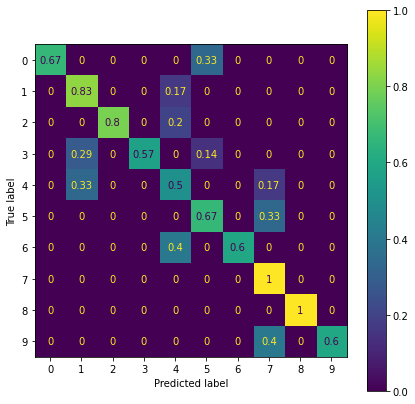

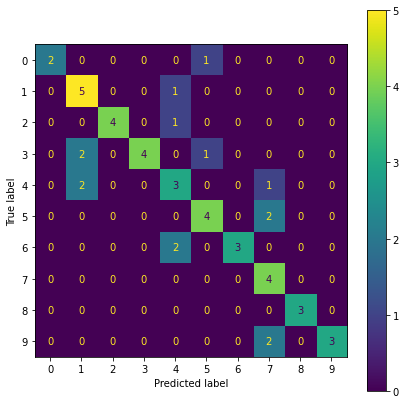

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predict_class = np.array(predicoes) > 0.1

cm = confusion_matrix(teste, predicoes, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)
plt.show()

cm = confusion_matrix(teste, predicoes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)
plt.show()  